Wave equation : $$\frac 1 {c^2}\partial_{t}^{2} u(x, t)-\Delta u(x, t) =0$$ 

Assuming that the wave is : $$u(x) \cdot e^{i\omega t}$$

Laplace domain equation : $$(\frac {\delta(s)} {c\Delta t})^2 U(s) - \Delta U(s) = 0$$

Frequency domain equation : $$-(\frac {\omega} {c})^2 u(x) - \Delta u(x) = 0$$

Laplace domain single layer : $$V(s') \phi = \sum_{\Gamma} \frac {e^{-s'r}} {4\pi r} \phi(\Delta \Gamma)$$

Frequency domain single layer : $$V(\omega i) \phi = \sum_{\Gamma} \frac {e^{ -i \frac {\omega} c r}} {4\pi r} \phi(\Delta \Gamma)$$

### Discrete Inverse Laplace Transform (Inverse Z Transform)

Discrete fourier transform :
$$
X(k) = \sum_{n = 0}^{N-1} x(n) e^{-i\frac{2\pi}{N} k n}
$$
Inverse discrete fourier transform :
$$
x(n) = \frac{1}{N} \sum_{k = 0}^{N-1} X(k) e^{i\frac{2\pi}{N} k n}
$$
Z transform
$$
X(z) = \sum_{n = 0}^{N-1} x(n) z^{-n} 
$$
Let $z_k = e^{r + i\frac{2\pi}{N}k} = \frac 1 \gamma e^{i\frac{2\pi}{N}k}$
$$
X(k) = X(z_k) = \sum_{n = 0}^{N-1} x(n)\gamma^n e^{-i\frac{2\pi}{N} k n}
$$

Inverse Z transform (IZT) & Inverse discrete fourier transform (IDFT)
$$
x(n)\gamma^n = \text{IDFT}(X(z_k))
$$
$$
\text{IZT}(x(z_k)) = x(n) = \gamma^{-n} \text{IDFT}(X(k)) = \frac {\gamma^{-n}} N \sum_{k = 0}^{N-1} X(z_k) e^{i\frac{2\pi}{N} k n}
$$

In our setting, $s_k = \frac 1 {z_k}$, so
$$
x(n) = \frac {\gamma^{-n}} N \sum_{k = 0}^{N-1} X(\frac 1 {s_k}) e^{i\frac{2\pi}{N} k n}
$$

For wave equation:
$$
e^{-s'r} = e^{-\frac {\delta(s)} {c\Delta t}r} = e^{-\frac {\delta(\frac 1 z)} {c\Delta t}r} = X(z) = \sum_{n = 0}^{N-1} x(n) z^{-n}
$$


and
$$
x(n) = \frac {\gamma^{-n}} N \sum_{k = 0}^{N-1} X(z_k) e^{i\frac{2\pi}{N} k n} = \frac {\gamma^{-n}} N \sum_{k = 0}^{N-1} (e^{-\frac {\delta(\frac 1 {z_k})} {c\Delta t}r}) e^{i\frac{2\pi}{N} k n}
$$

Finally
$$
s_k = \gamma e^{-i\frac {2\pi} N k}
$$
with
$$
    e^{-\frac {\delta(s_k)} {c\Delta t}r} = e^{-\frac {\delta( \gamma e^{-i \frac {2\pi} N k})} {c\Delta t}r} = \sum_{n = 0}^{N-1} v(n) s_k^{n}
$$
and
$$
v(n) = \frac {\gamma^{-n}} N \sum_{k = 0}^{N-1} (e^{-\frac {\delta(\gamma e^{-i\frac {2\pi} N k})} {c\Delta t}r}) e^{i\frac{2\pi}{N} k n}
$$

Source:
$$
\phi(n) = e^{i \omega n \Delta t}
$$

Frequency Domain:
$$
x(n) = e^{-i \frac {\omega} c r} \cdot e^{i \omega n \Delta t}
$$
Laplace Domain:
$$
v(n) = \frac {\gamma^{-n}} N \sum_{k = 0}^{N-1} (e^{-\frac {\delta(\gamma e^{-i\frac {2\pi} N k})} {c\Delta t}r}) e^{i\frac{2\pi}{N} k n}
$$

$$
x(n) = \sum_{k = 0}^{N-1} v(k) \cdot e^{i \omega (n-k) \Delta t}
$$

注意：
- 如果N太小，会导致signal变为0，这是因为事实上N*dt时间后并未传播到listen position
- 由于frequency domain layer中exp指数的系数为omega\*r,因此在omega\*r过大时，会导致1/dt的最大频率范围也不够用，从而产生明显误差。相关参数主要有高频，以及src to target的距离（boundary integral中两个面之间的距离以及potential integral中面到点的距离）。


In [9]:
import numpy as np
import matplotlib.pyplot as plt

freq = 2333
omega = 2*np.pi*freq
c = 343
dt = 0.00002
gamma = 0.9
r = 0.0123
N = 16

def BDF2(x):
    return 0.5*(x*x - 4*x + 3)


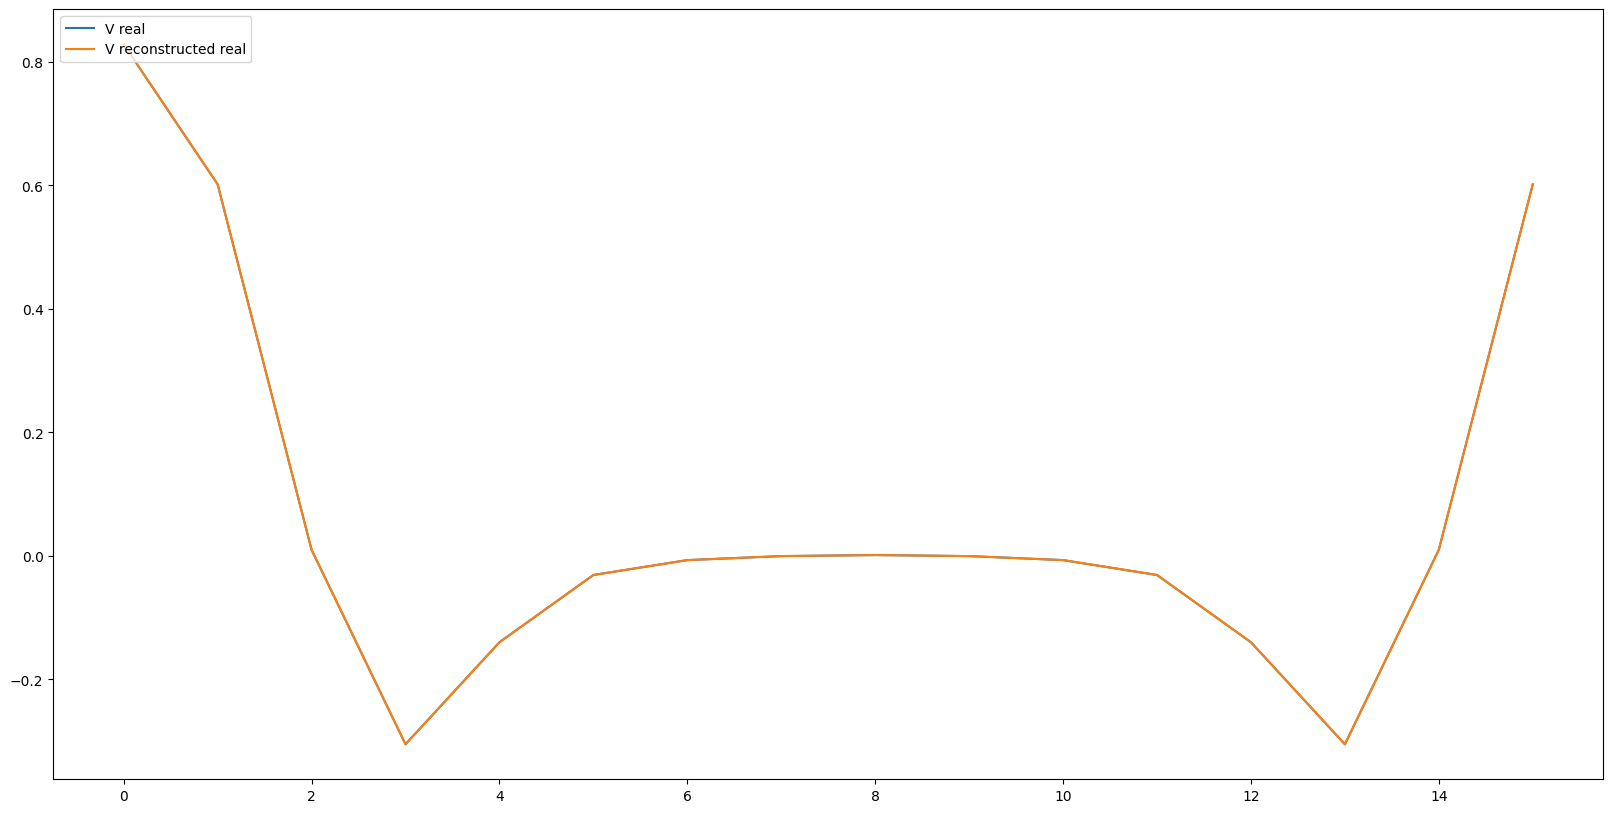

In [10]:
V = np.zeros(N).astype(np.complex128)
for k in range(N):
    V[k] = np.exp(-BDF2(gamma*np.exp(-1j*2*np.pi/N*k))/(c*dt)*r)
    
v = np.zeros(N).astype(np.complex128)
for n in range(N):
    for k in range(N):
        v[n] += V[k] * np.exp(1j*2*np.pi/N*n*k)
    v[n] *= gamma**(-n)/N
    
V_reconstructed = np.zeros(N).astype(np.complex128)
for k in range(N):
    for n in range(N):
        V_reconstructed[k] += v[n]*(gamma*np.exp(-1j*2*np.pi/N*k))**n


plt.figure(figsize=(20,10))
plt.plot(V.real, label='V real')
# plt.plot(V.imag, label='V imag')
plt.plot(V_reconstructed.real, label='V reconstructed real')
# plt.plot(V_reconstructed.imag, label='V reconstructed imag')
plt.legend(loc="upper left")

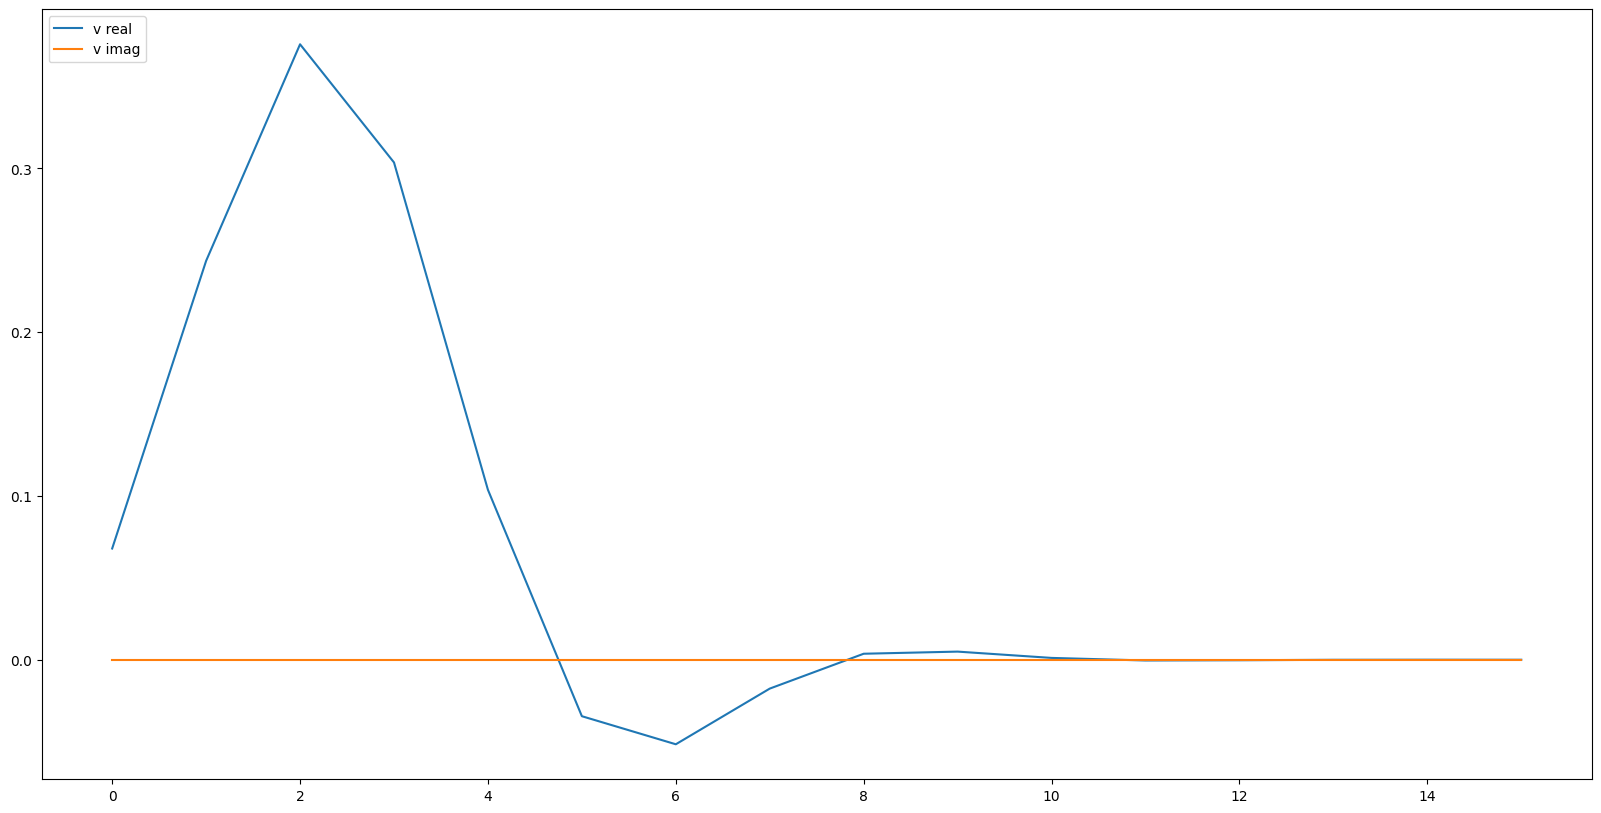

In [11]:
plt.figure(figsize=(20,10))
plt.plot(v.real, label='v real')
plt.plot(v.imag, label='v imag')
plt.legend(loc="upper left")

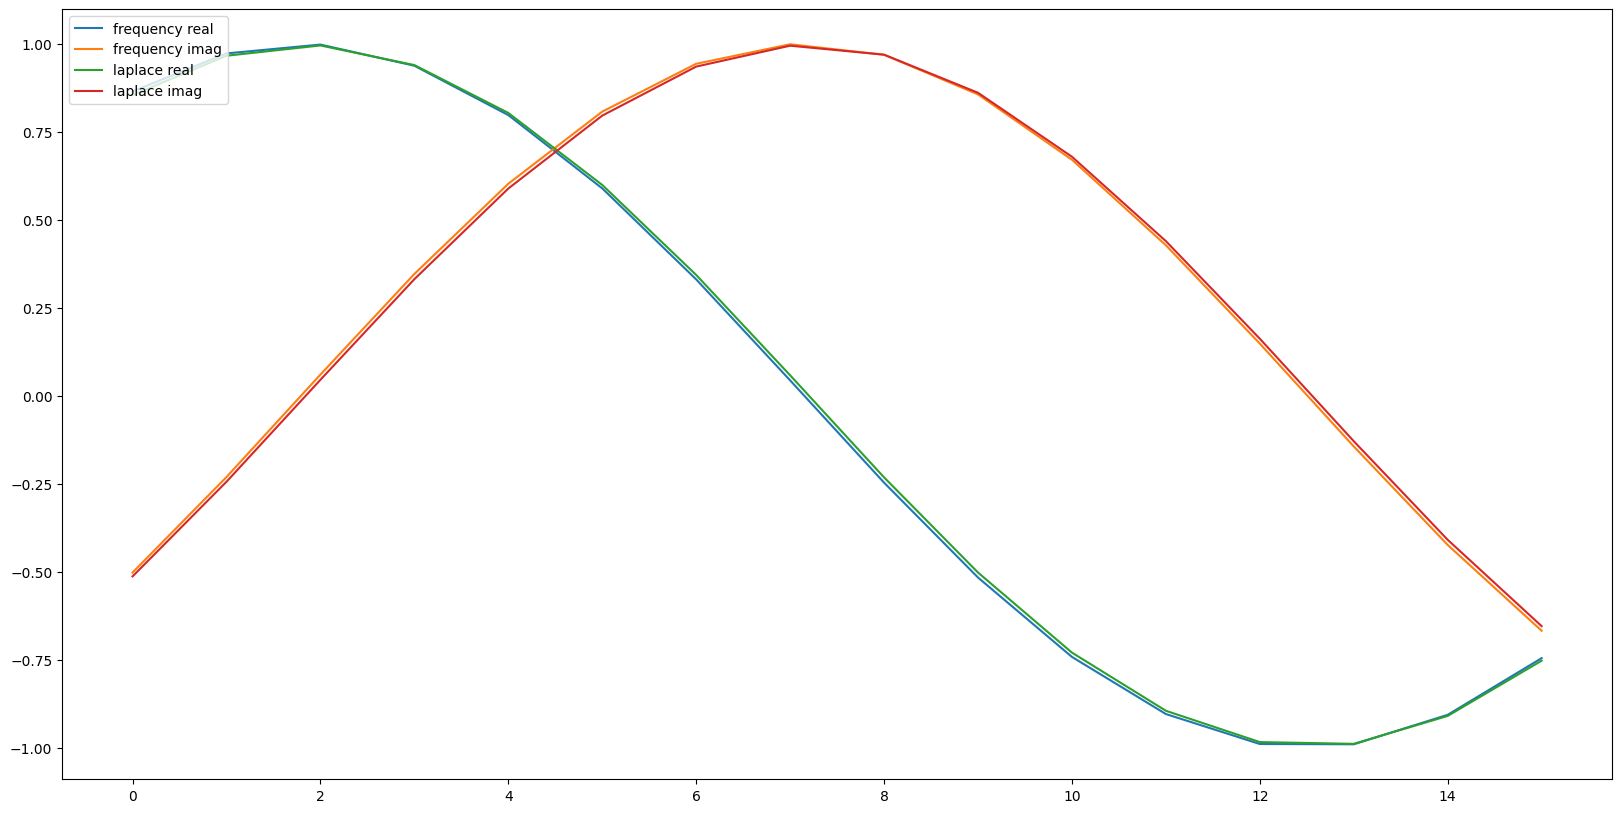

In [12]:
# frequency domain
freq_result = np.zeros(N).astype(np.complex128)
for n in range(N):
    freq_result[n] = np.exp(-1j*omega/c*r)*np.exp(1j*omega*n*dt)
# laplace domain
laplace_result = np.zeros(N).astype(np.complex128)
for n in range(N):
    for k in range(N):
        laplace_result[n] += v[k]*np.exp(1j*omega*(n-k)*dt)
plt.figure(figsize=(20,10))
plt.plot(freq_result.real, label='frequency real')
plt.plot(freq_result.imag, label='frequency imag')
plt.plot(laplace_result.real, label='laplace real')
plt.plot(laplace_result.imag, label='laplace imag')
plt.legend(loc="upper left")